In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
tweets_data_path = 'stream_tchau_querida.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

tweets = pd.DataFrame()


In [3]:
#teste = [lambda tw: tw['text'] for x in tweets_data]

textos = []
lingua = []
pais = []

for tw in tweets_data:
    try:        
        if(tw['text']!=None):
            textos.append(tw['text'])
        else:
            textos.append(None)
        if(tw['lang']!=None):
            lingua.append(tw['lang'])
        else:
            lingua.append(None)
        
        if(tw['place']!=None):
            pais.append(tw['place']['country'])
        else:
            pais.append(None)
            
    except:        
        continue
    
print(len(textos))
print(len(lingua))
print(len(pais))


30281
30281
30281


In [4]:


#tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
#tweets['text'] = [get_tw_text for x in tweets_data]
#tweets['lang'] = [str(get_tw_lang) for x in tweets_data]
#tweets['country'] = [get_tw_country for x in tweets_data]

#text = [lambda tw: str(tw['text']) for x in tweets_data]
#text = map(lambda tw: tw['text'], tweets_data)


#tweets['text'] = [lambda tw: str(tw['text']) for x in tweets_data]
tweets['text'] = textos


#tweets['lang'] = [lambda tw: str(tw['lang']) for x in tweets_data]
tweets['lang'] = lingua

#pais = [lambda tw: tw['place']['country'] for x in tweets_data]
tweets['country'] = pais


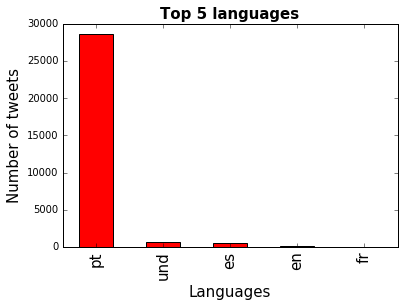

In [5]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

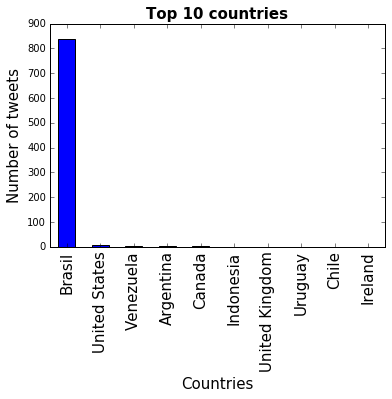

In [11]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')

In [9]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

mineracao = pd.DataFrame()

tweets['dilma'] = tweets['text'].apply(lambda tweet: word_in_text('dilma', tweet))
tweets['impeachment'] = tweets['text'].apply(lambda tweet: word_in_text('impeachment', tweet))
tweets['golpe'] = tweets['text'].apply(lambda tweet: word_in_text('golpe', tweet))


print(tweets['dilma'].value_counts()[True])
print(tweets['impeachment'].value_counts()[True])
print(tweets['golpe'].value_counts()[True])

tweets.head()

5286
3859
147


,text,lang,country,dilma,impeachment,golpe
0,"RT @indelikada: TCHAU QUERIDA, SENTA E CHORA!!...",pt,None,False,True,False
1,RT @danivigne: Tchau Querida! #ImpeachmentDay ...,pt,None,False,True,False
2,RT @Kefera: TCHAU QUERIDA,pt,None,False,False,False
3,Tchau querida 󾌬 \n\nSem mais. 󾍂,pt,None,False,False,False
4,Tchau querida!,pt,None,False,False,False


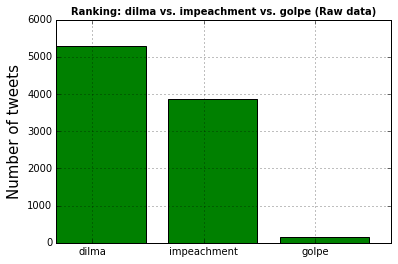

In [10]:
prg_langs = ['dilma', 'impeachment', 'golpe']
tweets_by_prg_lang = [tweets['dilma'].value_counts()[True], tweets['impeachment'].value_counts()[True], tweets['golpe'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: dilma vs. impeachment vs. golpe (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()